In [1]:
%run /Users/denis/Documents/Projects/scripts/init.ipy
os.chdir(os.getcwd().replace('/pipeline/notebooks', ''));

### 1. Get Data

In [2]:
auc_dataframe = pd.read_table('s4-merged_auc.dir/gene_auc.txt')
auc_dataframe.head()

gene_symbol  auc    normalization               library
0  1300017J02RIK  NaN  autorif_overlap  ARCHS4_Kinases_Coexp
1  1700013H16RIK  NaN  autorif_overlap  ARCHS4_Kinases_Coexp
2  1700093K21RIK  NaN  autorif_overlap  ARCHS4_Kinases_Coexp
3  2010109I03RIK  NaN  autorif_overlap  ARCHS4_Kinases_Coexp
4  2410089E03RIK  NaN  autorif_overlap  ARCHS4_Kinases_Coexp

In [3]:
associated_term_dataframe = pd.melt(pd.read_table('rawdata.dir/gmt_counts_new.txt'), id_vars='Unnamed: 0').rename(columns={'Unnamed: 0': 'gene_symbol', 'variable': 'library', 'value': 'nr_terms'})
associated_term_dataframe.head()

gene_symbol                     library  nr_terms
0     A1BGAS1  GO_Molecular_Function_2018         0
1        A1CF  GO_Molecular_Function_2018         2
2         A2M  GO_Molecular_Function_2018         6
3       A2ML1  GO_Molecular_Function_2018         1
4       A2MP1  GO_Molecular_Function_2018         0

In [21]:
def termsize(x):
    if x <= 10:
        return 'few'
    elif 10 < x <= 100:
        return 'medium'
    elif x > 100:
        return 'lots'

### 2. Merge

In [24]:
plot_dataframe = auc_dataframe.merge(associated_term_dataframe, on=['gene_symbol', 'library']).dropna().query('normalization in ["autorif_overlap_zscore", "generif_overlap_zscore", "zscore", "correlation", "random"]')
plot_dataframe['term_size'] = [termsize(x) for x in plot_dataframe['nr_terms']]
plot_dataframe['random'] = ['better' if x > 0.5 else 'worse' for x in plot_dataframe['auc']]
print(plot_dataframe.shape)
plot_dataframe.head()

(606454, 6)


gene_symbol       auc           normalization               library  \
1        A1CF  0.745935  autorif_overlap_zscore  ARCHS4_Kinases_Coexp   
2        A1CF  0.994241             correlation  ARCHS4_Kinases_Coexp   
6        A1CF  0.473916  generif_overlap_zscore  ARCHS4_Kinases_Coexp   
7        A1CF  0.556572                  random  ARCHS4_Kinases_Coexp   
9        A1CF  0.985772                  zscore  ARCHS4_Kinases_Coexp   

   nr_terms term_size  
1         6       few  
2         6       few  
6         6       few  
7         6       few  
9         6       few

### 3. Violin Plots

/Users/denis/anaconda3/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning:

from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.



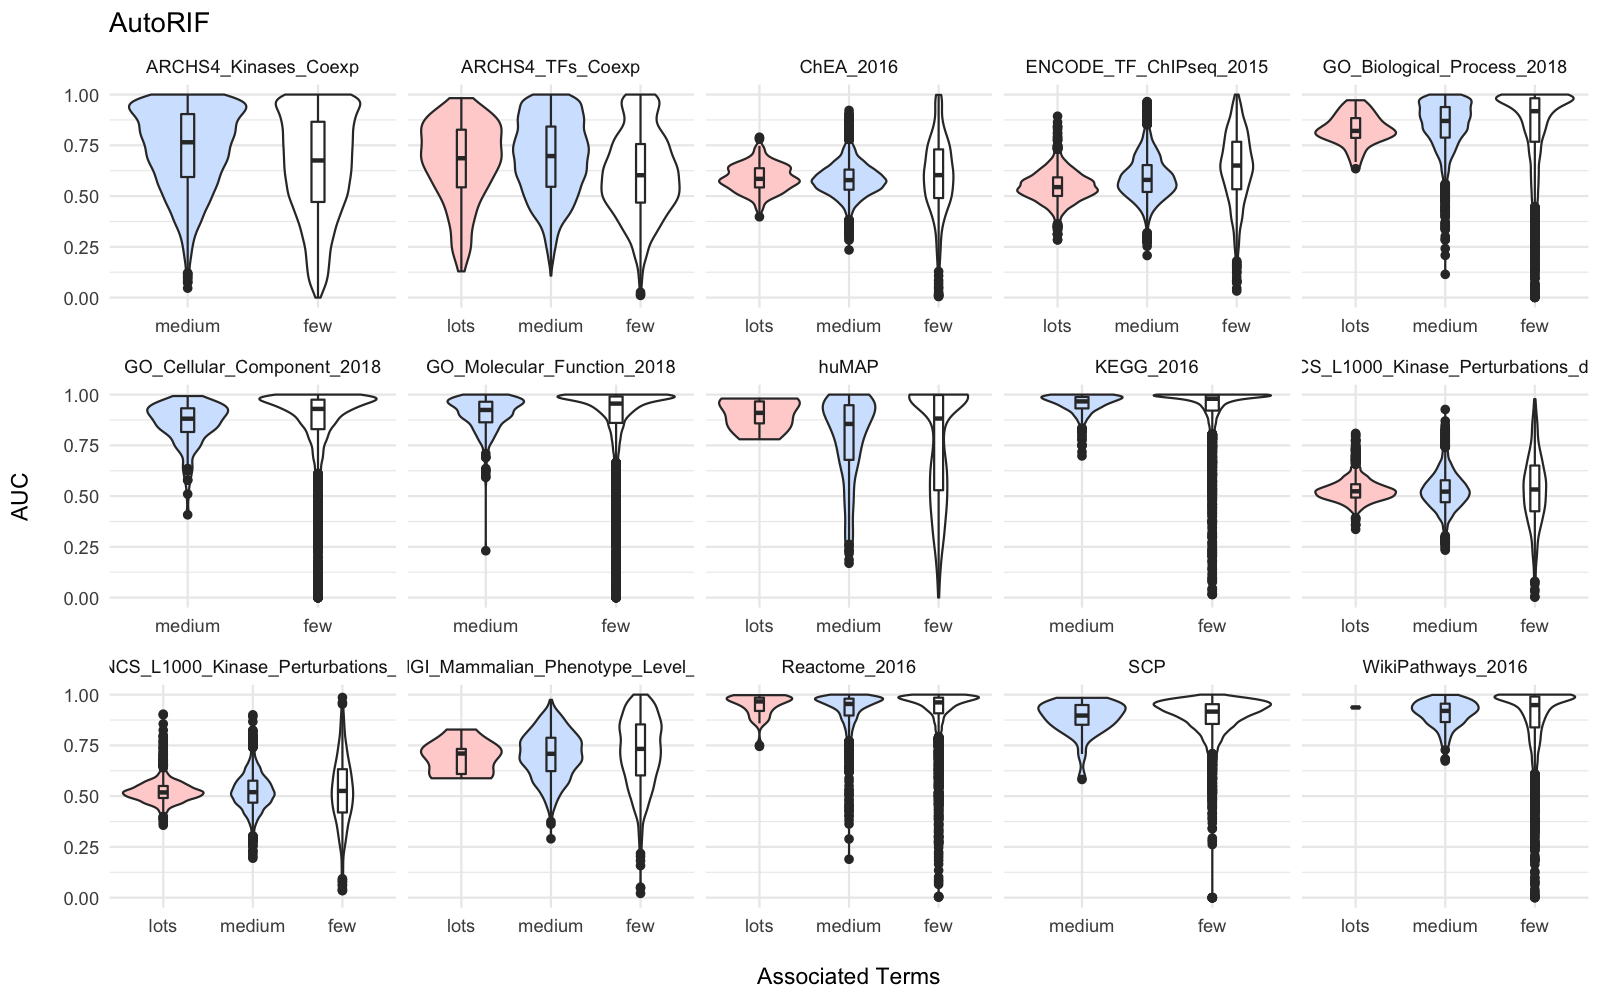

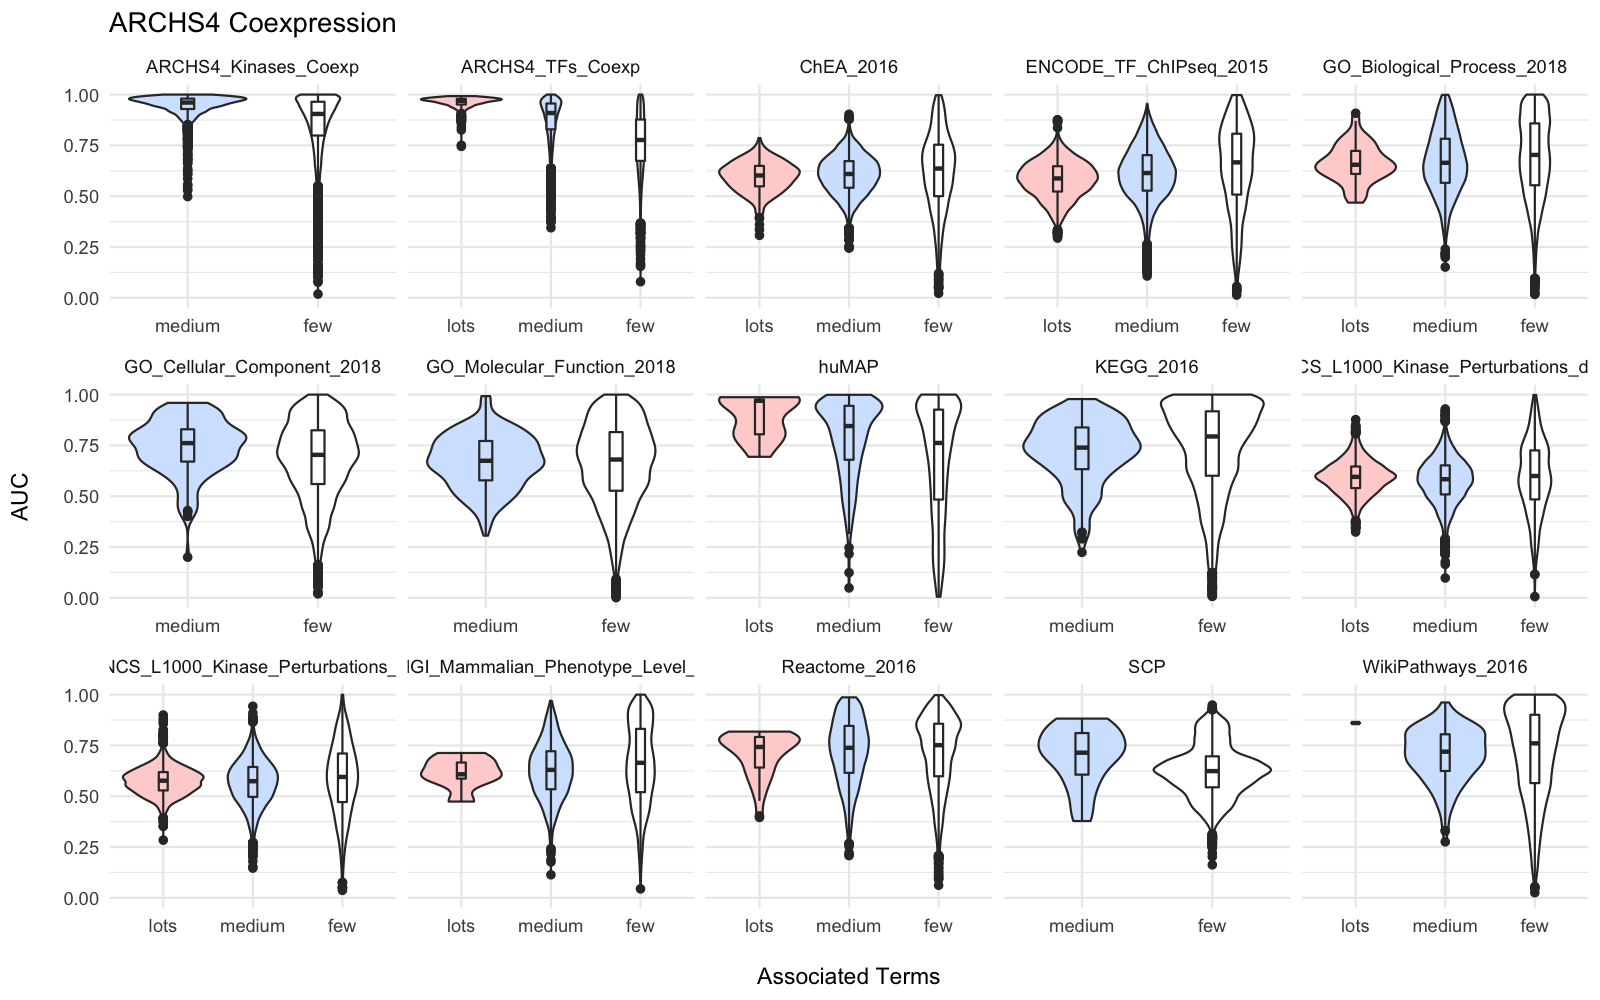

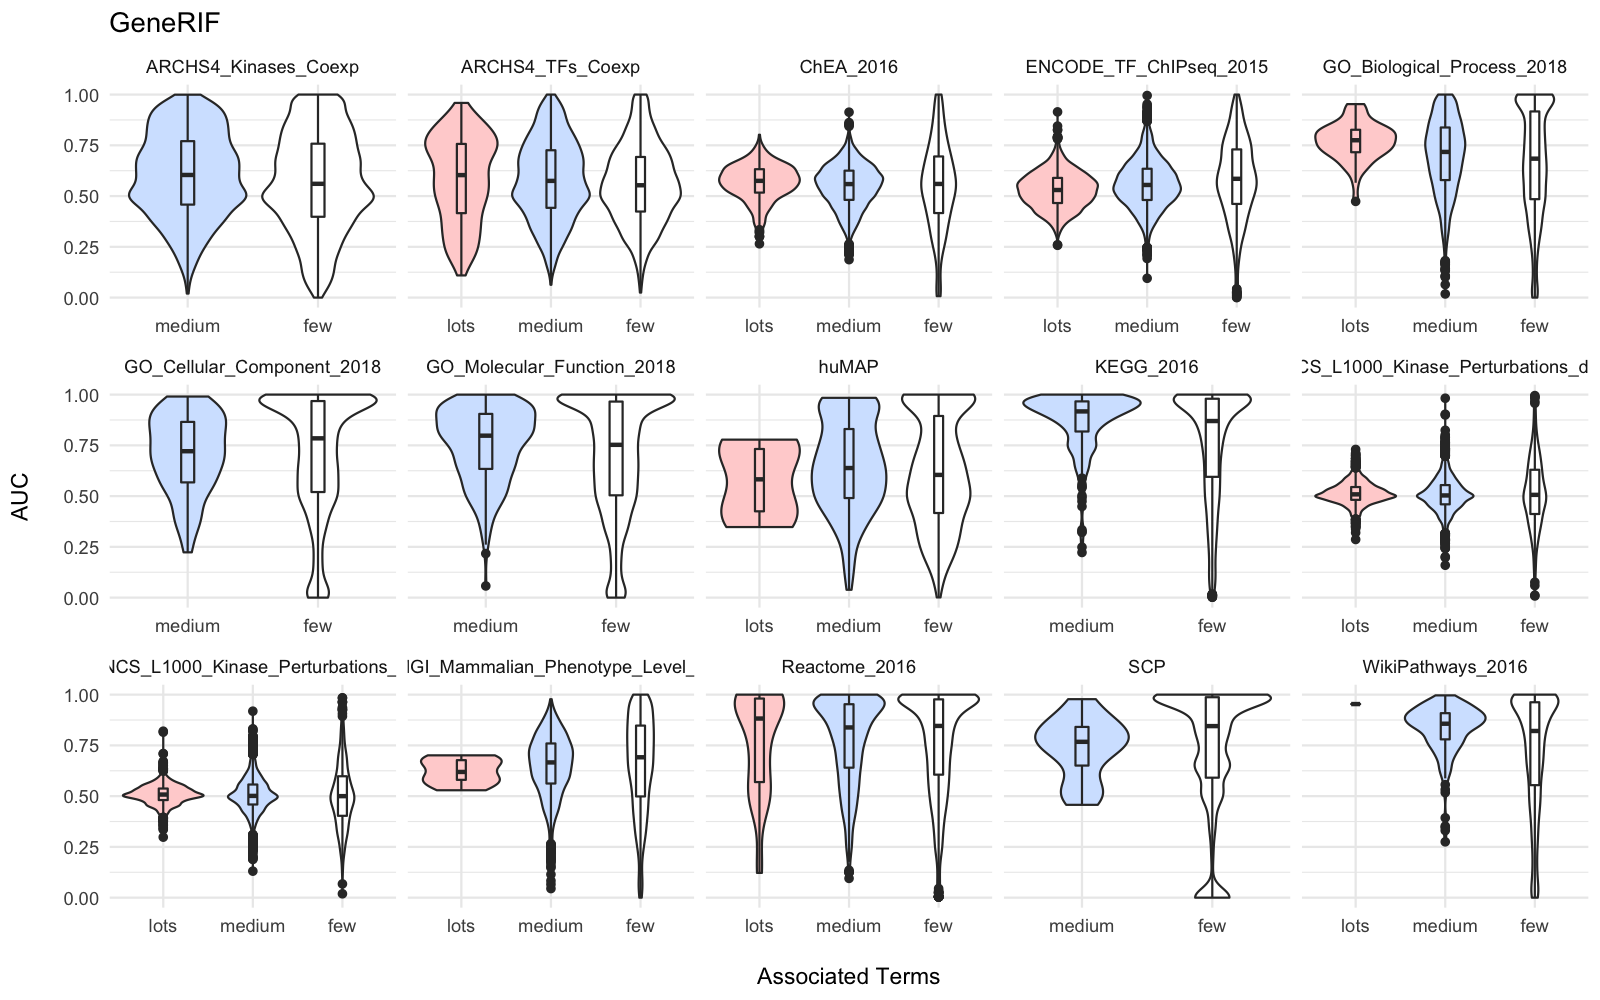

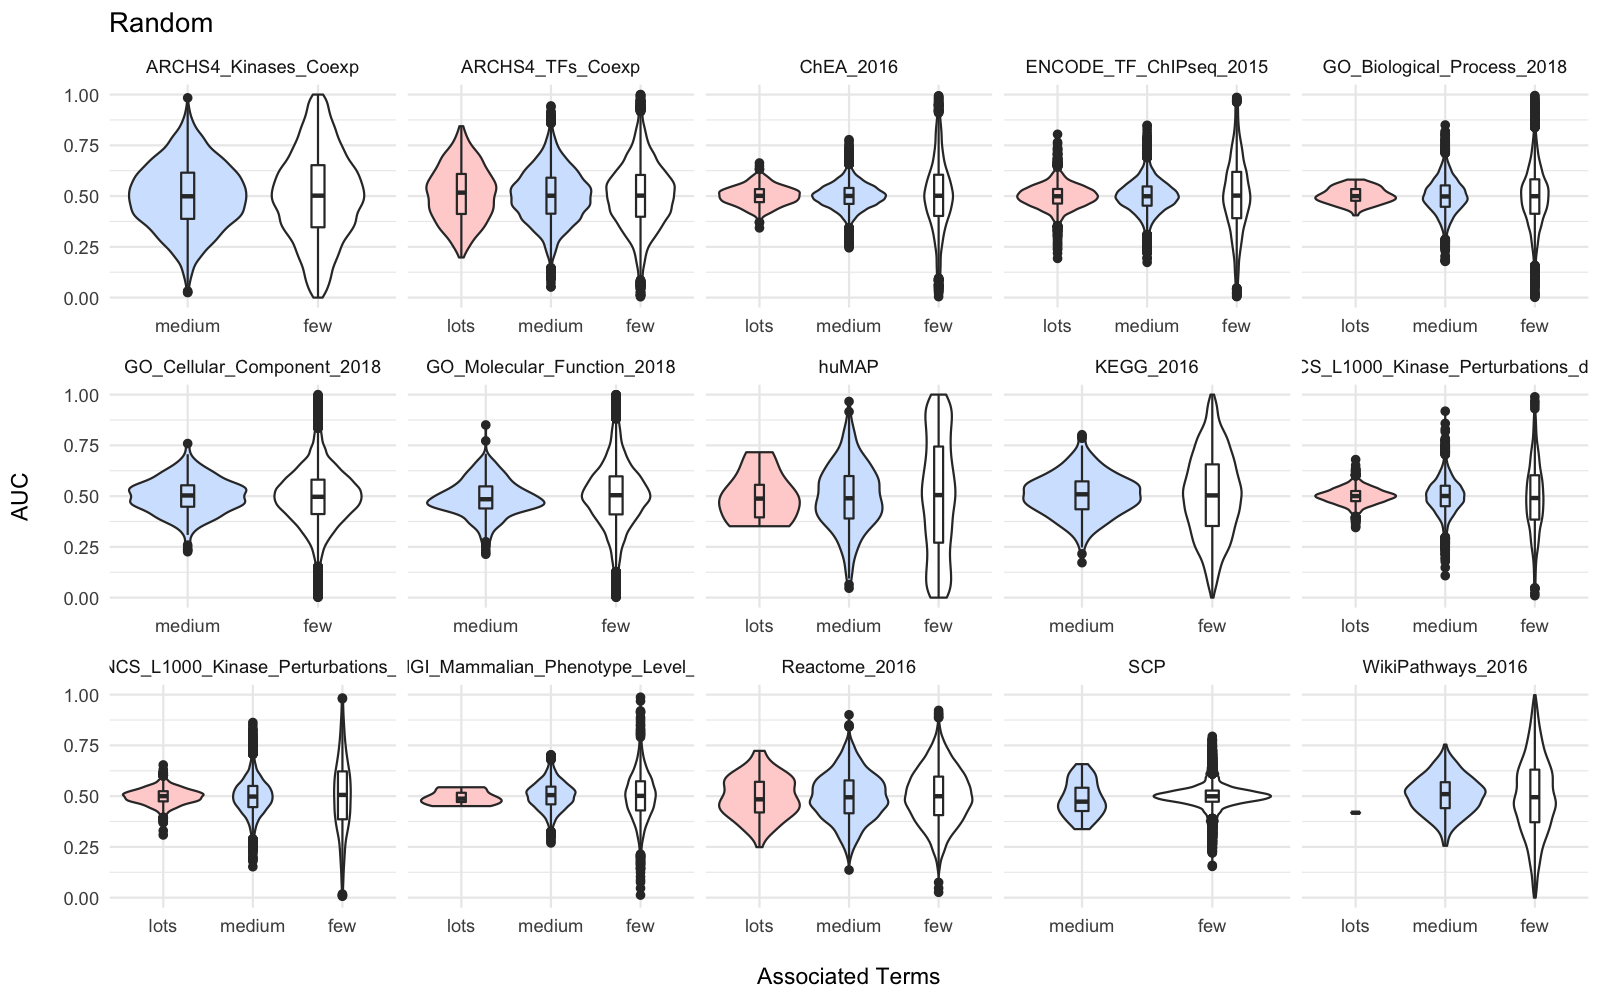

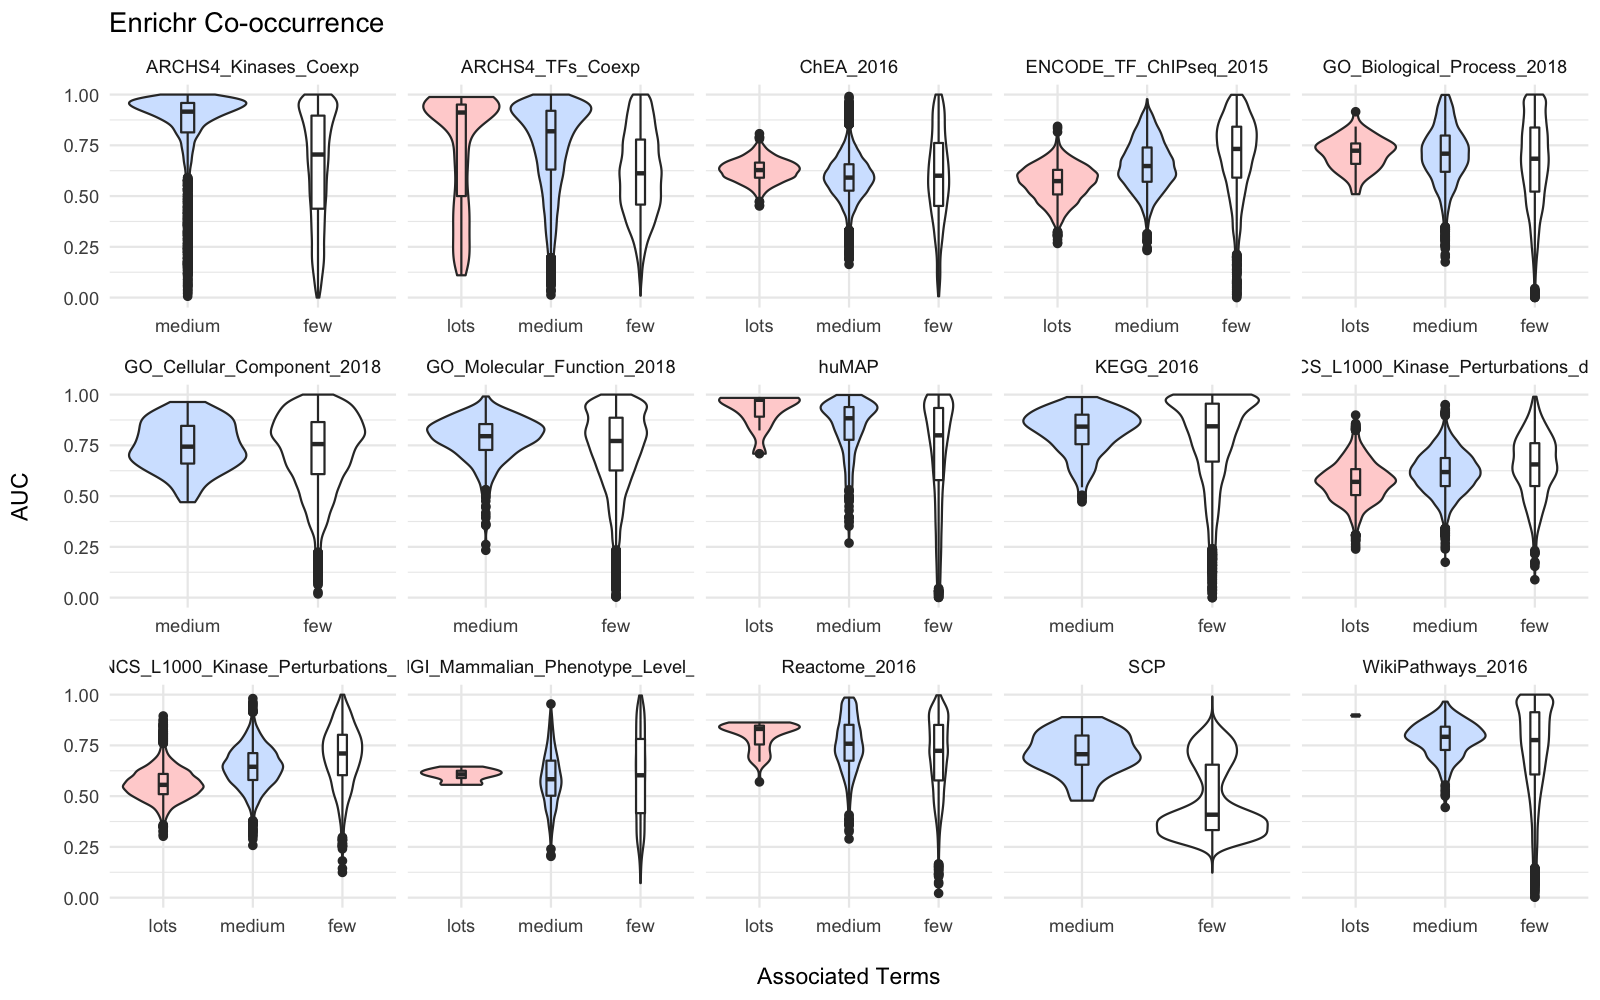

In [32]:
for normalization in plot_dataframe.normalization.unique():
    plot_dataframe_subset = plot_dataframe[plot_dataframe['normalization'] == normalization]
    normalization = normalization.replace('correlation', 'ARCHS4 Coexpression').replace('generif_overlap_zscore', 'GeneRIF').replace('autorif_overlap_zscore', 'AutoRIF').replace('zscore', 'Enrichr Co-occurrence').replace('random', 'Random')
    %R -i plot_dataframe_subset,normalization -h 1000 -w 1600 -r 150 gp <- ggplot(plot_dataframe_subset, aes(x=reorder(term_size, (-nr_terms), FUN=median), y=auc, fill=term_size)) + geom_violin() + geom_boxplot(width=0.1) + facet_wrap(~library, ncol=5, scales='free_x') + scale_fill_manual(values=c('white', '#ffd3d3', '#d3e4ff')) + xlab('\nAssociated Terms') + ylab('AUC\n') + ggtitle(normalization) + guides(fill=FALSE) + theme_minimal(); print(gp);

### 4. Scatter Plots

In [41]:
for normalization in plot_dataframe.normalization.unique():
    plot_dataframe_subset = plot_dataframe[plot_dataframe['normalization'] == normalization]
    normalization = normalization.replace('correlation', 'ARCHS4 Coexpression').replace('generif_overlap_zscore', 'GeneRIF').replace('autorif_overlap_zscore', 'AutoRIF').replace('zscore', 'Enrichr Co-occurrence').replace('random', 'Random')
    %R -i plot_dataframe_subset,normalization -h 1000 -w 1600 -r 150 gp <- ggplot(plot_dataframe_subset, aes(x=nr_terms, y=auc)) + geom_point(alpha=0.3) + geom_rug(alpha=0.1, color='grey') + facet_wrap(~library, ncol=5, scales='free') + ggtitle(normalization) + ylab('\nAUC') + xlab('Associated terms') + theme_minimal(); print(gp);

### 5. Boxplots

/Users/denis/anaconda3/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning:

from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.



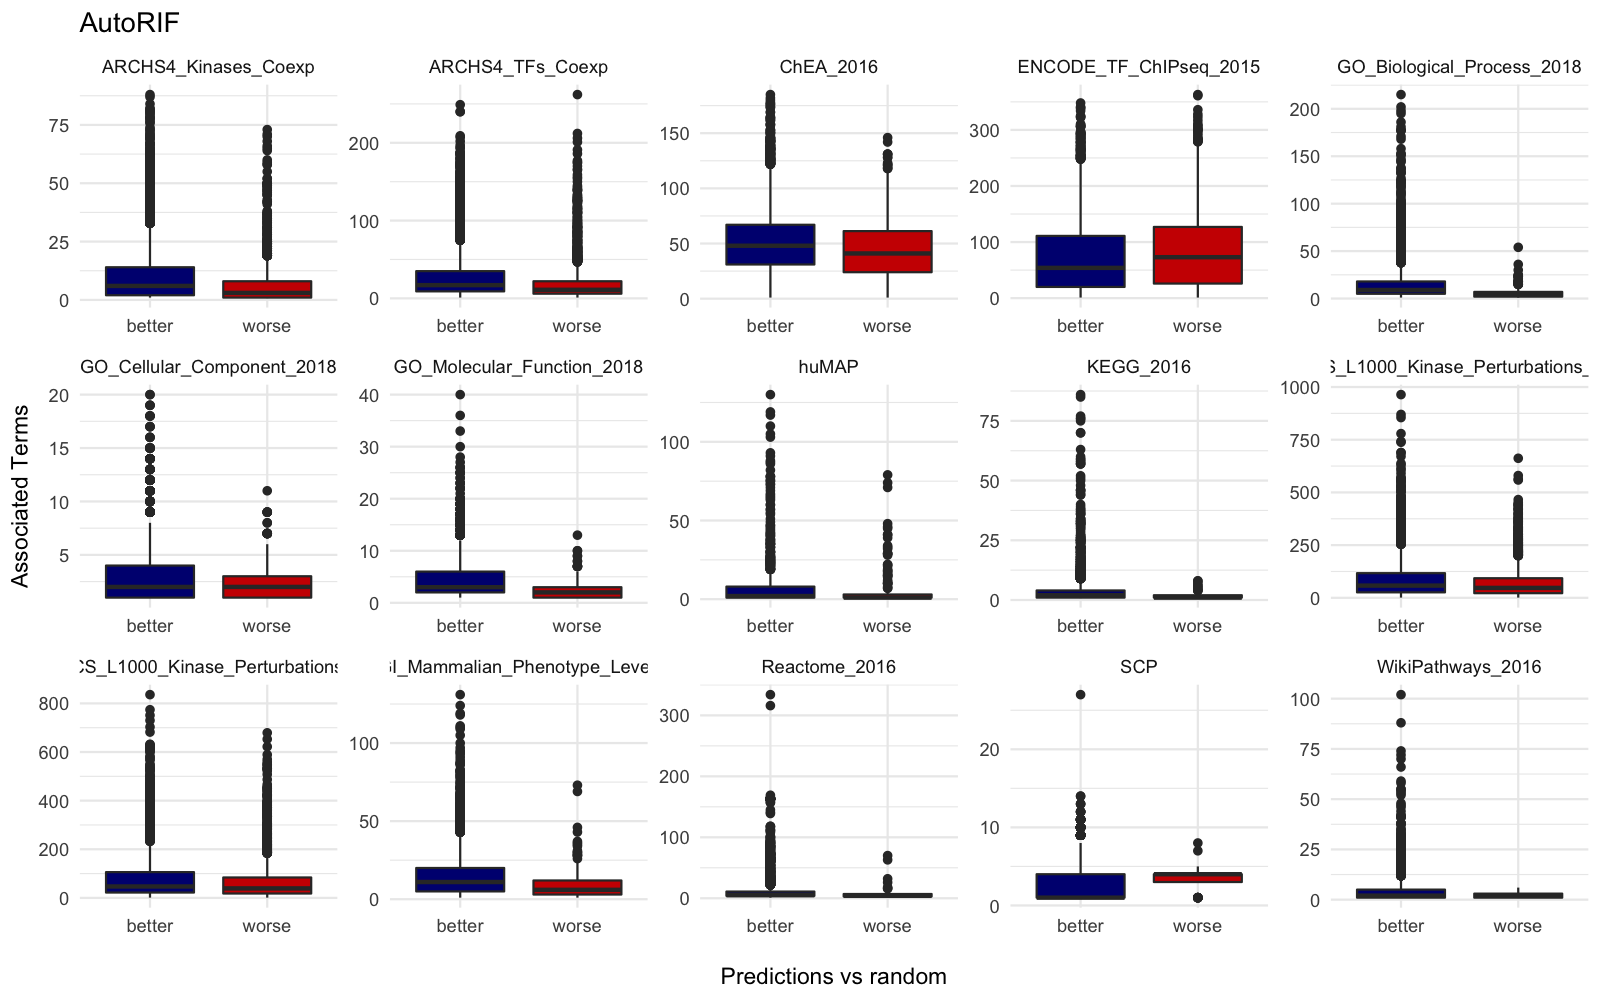

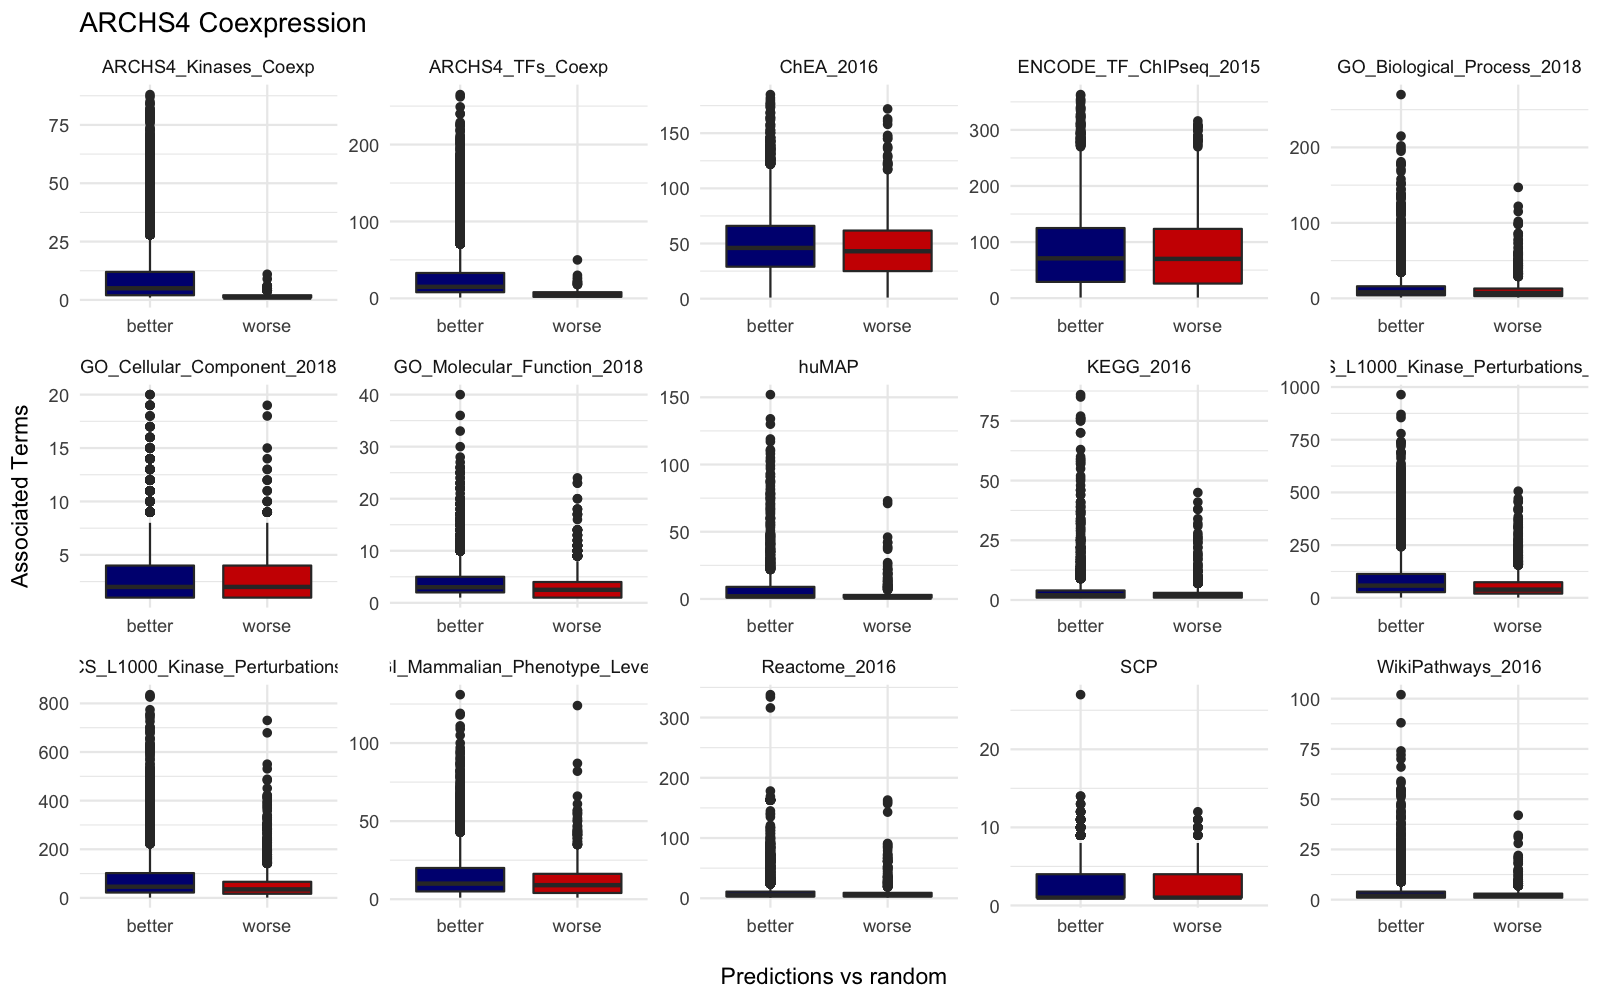

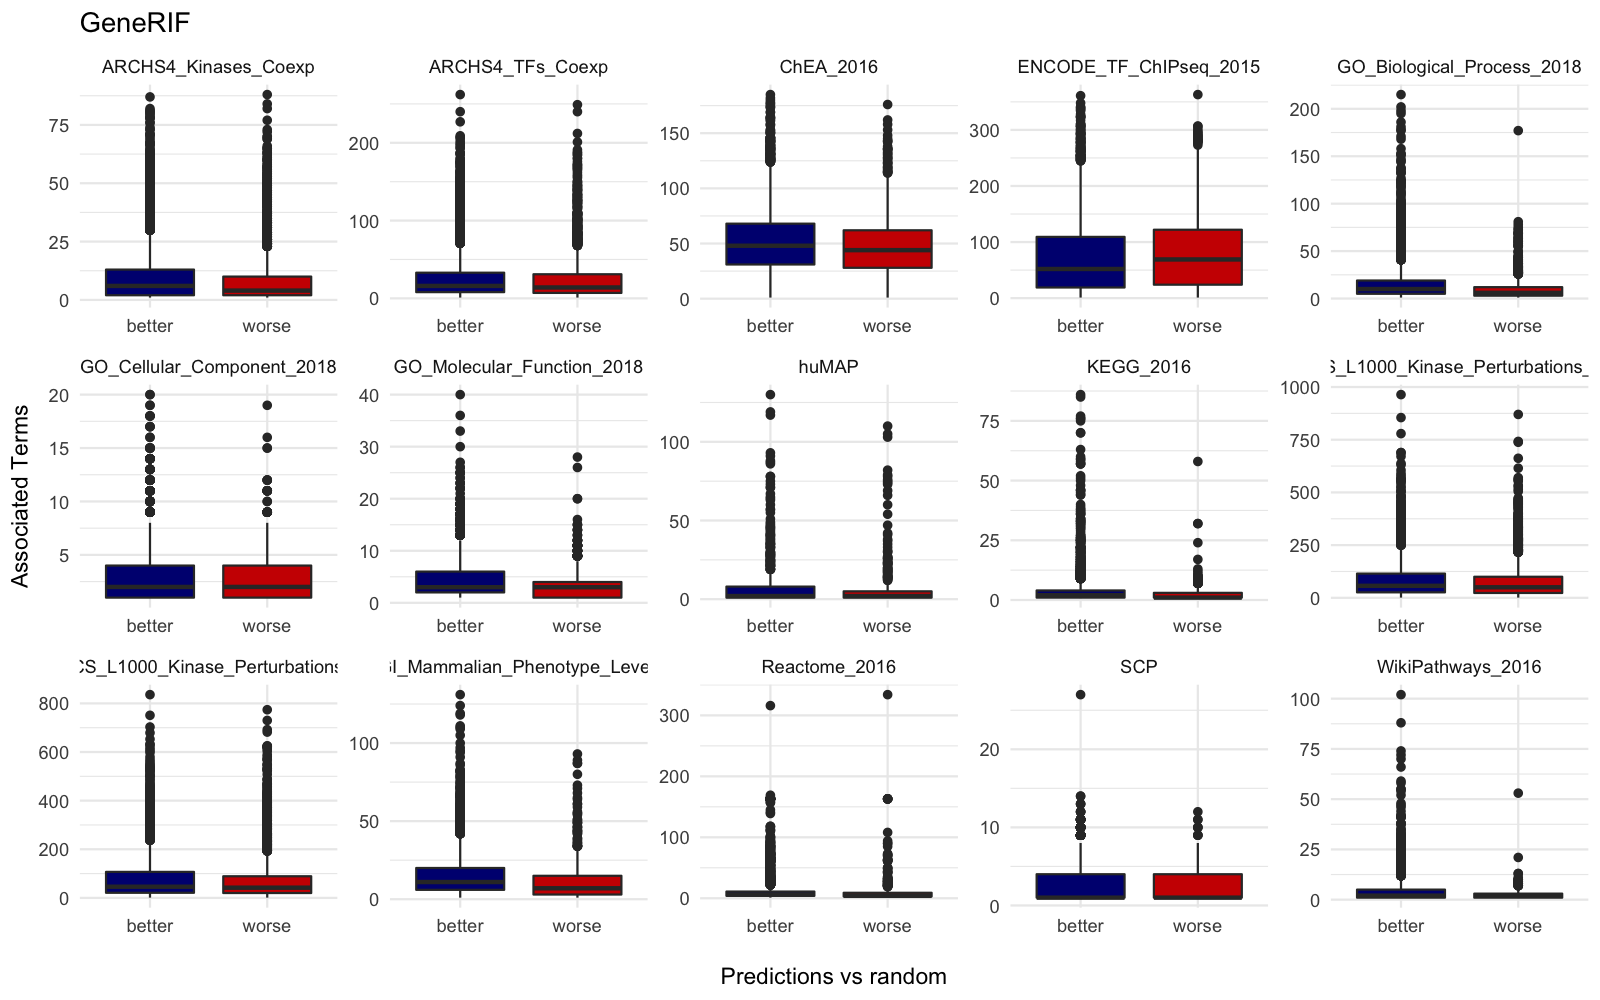

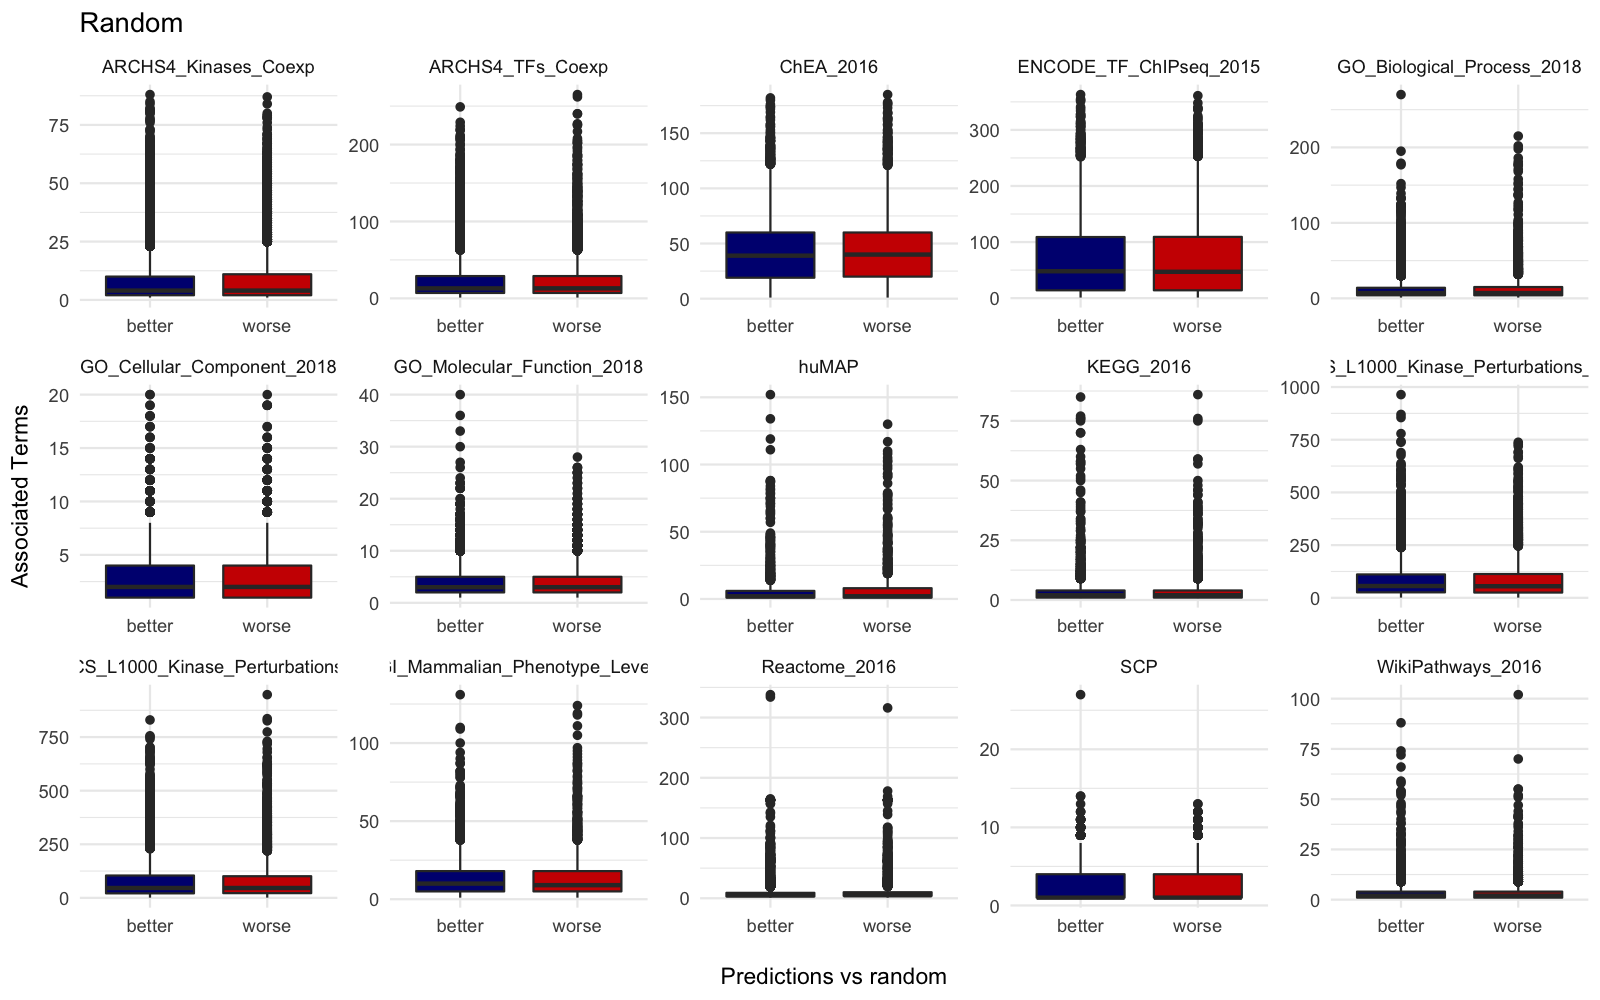

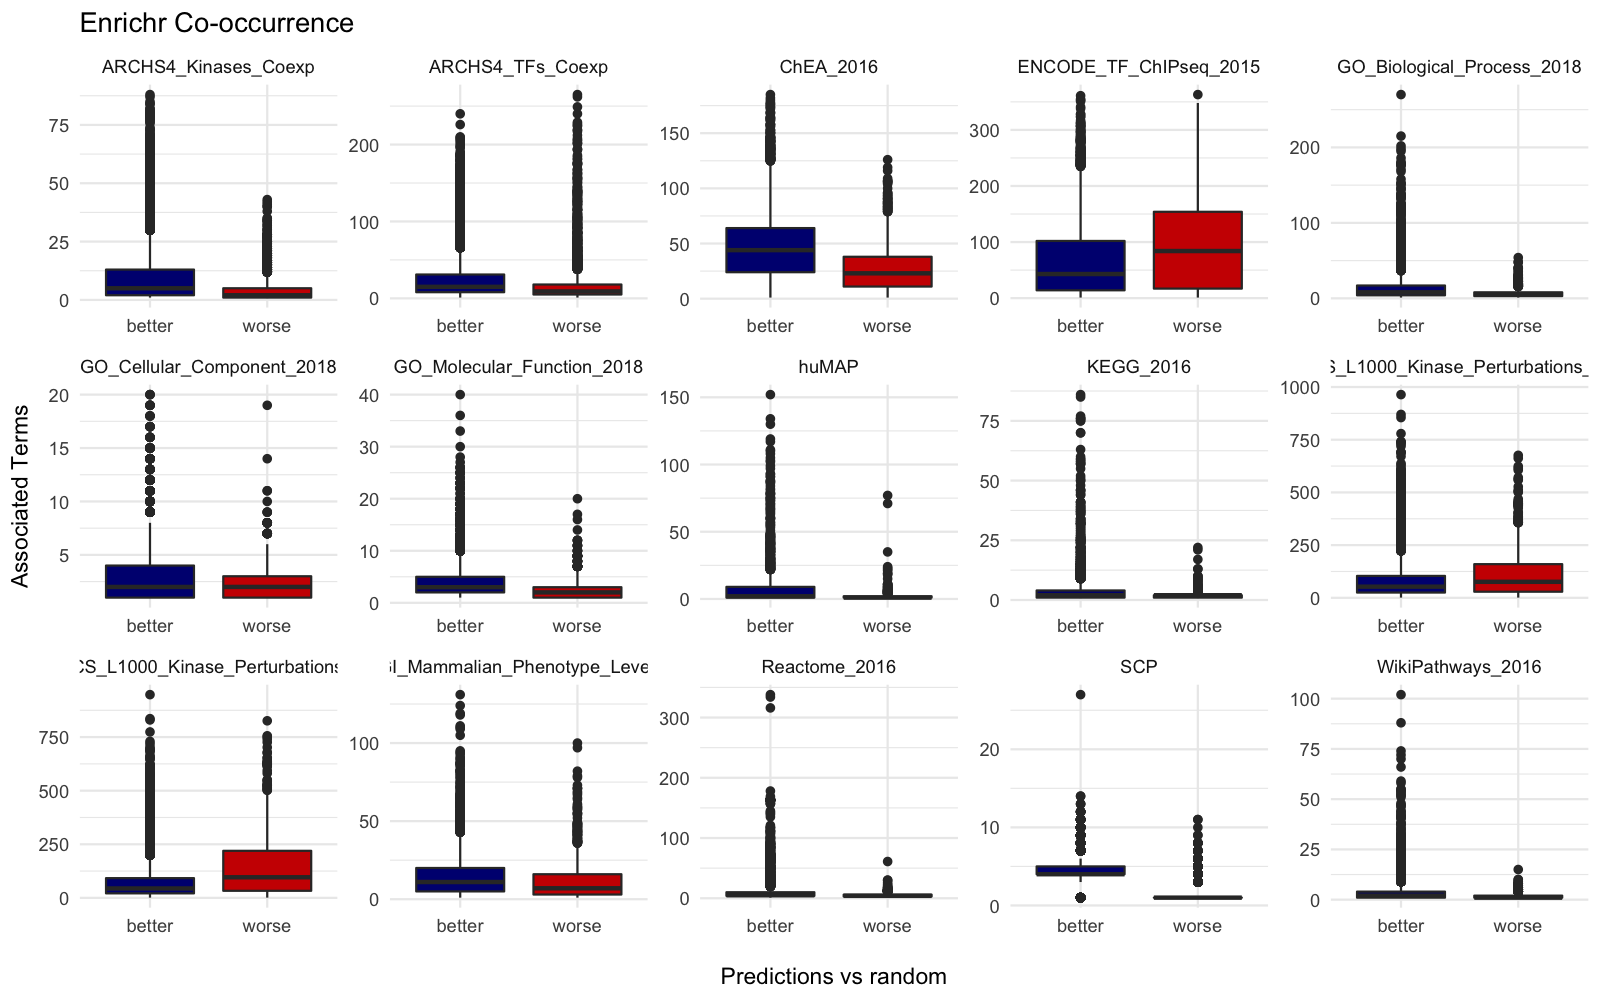

In [48]:
for normalization in plot_dataframe.normalization.unique():
    plot_dataframe_subset = plot_dataframe[plot_dataframe['normalization'] == normalization]
    normalization = normalization.replace('correlation', 'ARCHS4 Coexpression').replace('generif_overlap_zscore', 'GeneRIF').replace('autorif_overlap_zscore', 'AutoRIF').replace('zscore', 'Enrichr Co-occurrence').replace('random', 'Random')
    %R -i plot_dataframe_subset,normalization -h 1000 -w 1600 -r 150 gp <- ggplot(plot_dataframe_subset, aes(x=random, y=nr_terms, fill=random)) + geom_boxplot() +scale_fill_manual(values=c('navyblue','red3')) + facet_wrap(~library, ncol=5, scales='free') + ggtitle(normalization) + xlab('\nPredictions vs random') + ylab('Associated Terms') + guides(fill=FALSE) + theme_minimal(); print(gp);